In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [2]:
dataset=pd.read_csv(r"C:\Users\Sanjay\Downloads\diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#data cleaning checking duplicate tuples

In [8]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
print(dataset.isna().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [12]:
#positive Vs nagative

<AxesSubplot:xlabel='Outcome', ylabel='count'>

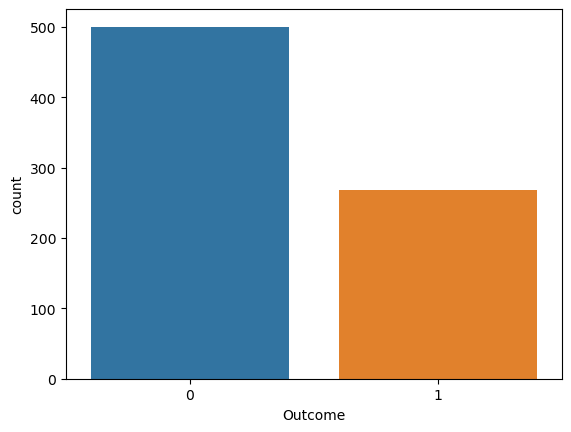

In [13]:
import seaborn as sns
sns.countplot(data = dataset, x='Outcome', label='count')

In [14]:
positive,nagative = dataset['Outcome'].value_counts()
print('Number of patients have positive: ',positive)
print('Number of patients have nagative: ',nagative)


Number of patients have positive:  500
Number of patients have nagative:  268


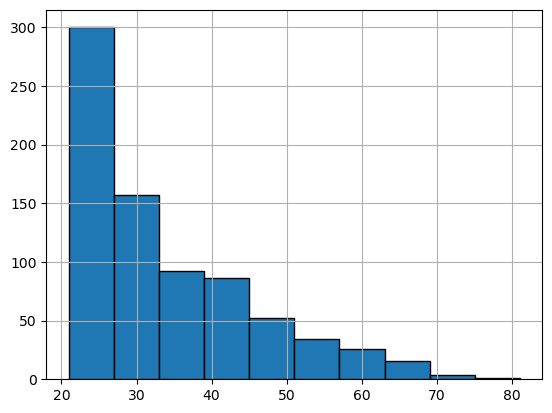

In [15]:
# The histagram of the Age variable was reached.
dataset["Age"].hist(edgecolor = "black");


In [16]:
print("Max Age: " + str(dataset["Age"].max()) + " Min Age: " + str(dataset["Age"].min()))

Max Age: 81 Min Age: 21


C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='BMI', ylabel='Density'>

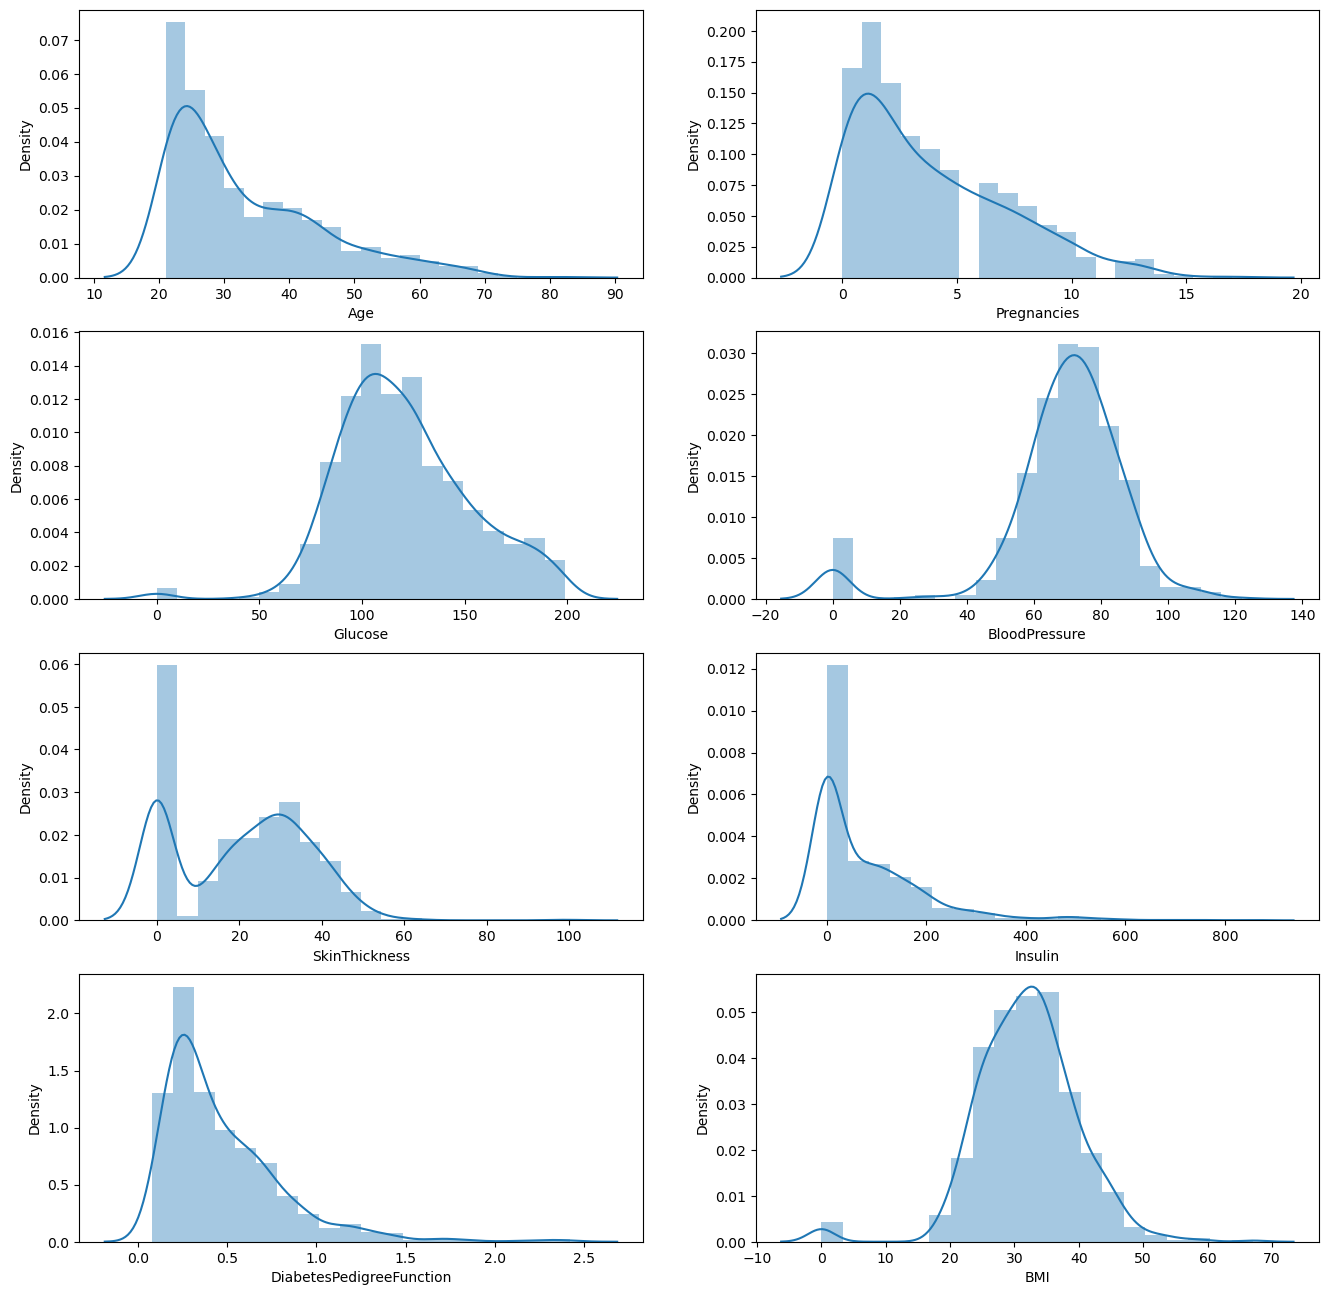

In [17]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dataset.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset.BMI, bins = 20, ax=ax[3,1]) 

In [18]:
#correlation matrix

<AxesSubplot:>

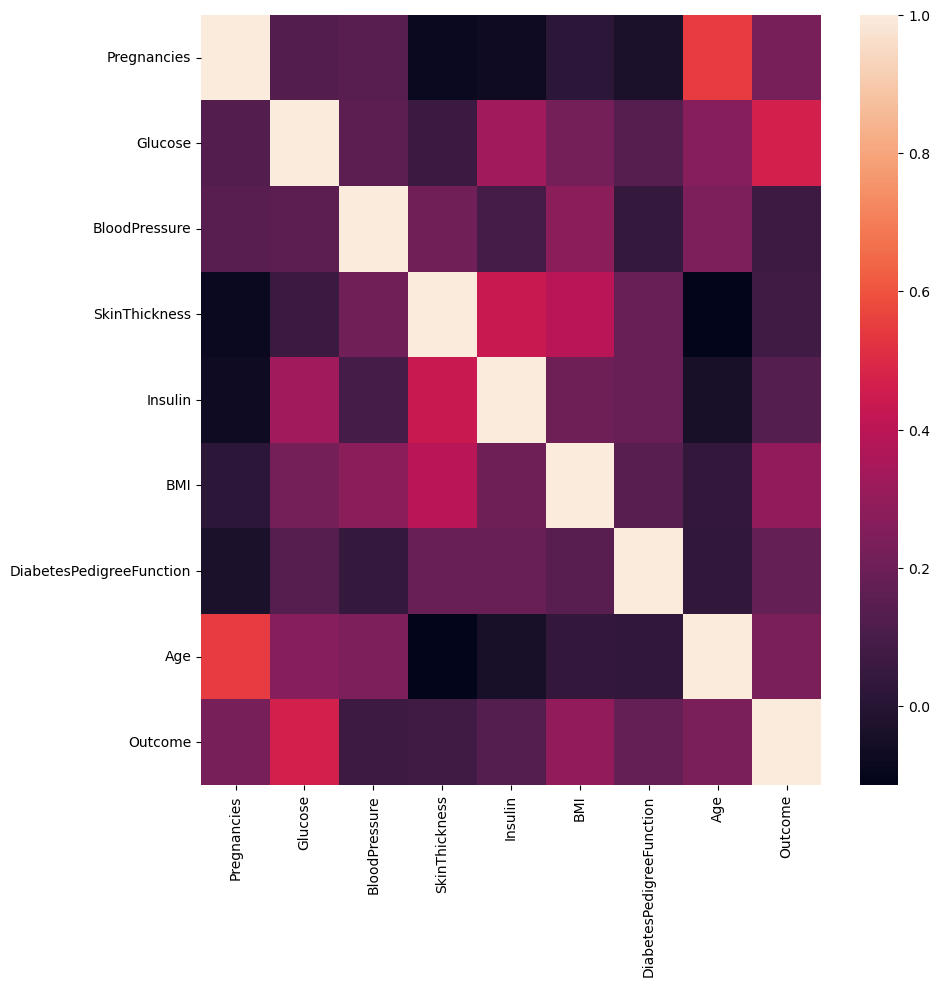

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

# data preparation

In [20]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [21]:
#spillting the data into training data and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# machine learning models

# 1.Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [24]:
#predicting the output
log_y_pred = log_classifier.predict(x_test)

<AxesSubplot:>

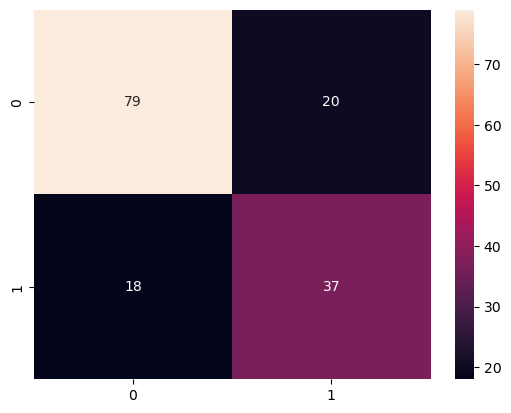

In [25]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm , annot=True)

In [26]:
from sklearn.metrics import accuracy_score, precision_score
# print(accuracy_score(y_test,log_y_pred))
# print(precision_score(y_test , log_y_pred))
# lg_re = recall_score(y_test , log_y_pred)

lg_acc = accuracy_score(y_test,log_y_pred)
lg_pre = precision_score(y_test , log_y_pred)
lg_cm = confusion_matrix(y_test,log_y_pred)

print(lg_acc)
print(lg_pre)
print(lg_cm)

0.7532467532467533
0.6491228070175439
[[79 20]
 [18 37]]


# 2.K-Nearest Neighbor(knn)

In [27]:
x_train.shape

(614, 8)

In [28]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier(n_neighbors =21, metric = 'minkowski') 
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [29]:
knn_y_pred = knn_classifier.predict(x_test)

C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

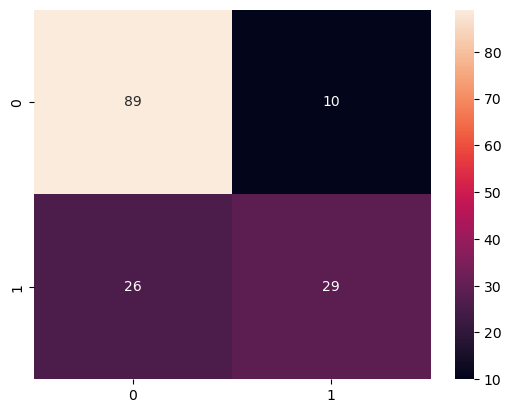

In [30]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm , annot=True)

In [31]:
# from sklearn.metrics import accuracy_score, precision_score
# print(accuracy_score(y_test,knn_y_pred))
# print(precision_score(y_test , knn_y_pred))

In [32]:
knn_acc = accuracy_score(y_test,knn_y_pred)
knn_pre = precision_score(y_test , knn_y_pred)
knn_cm = confusion_matrix(y_test,knn_y_pred)

print(knn_acc)
print(knn_pre)
print(knn_cm)

0.7662337662337663
0.7435897435897436
[[89 10]
 [26 29]]


# 3. Support Vector Machine(svm)

In [33]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [34]:
svm_y_pred = svm_classifier.predict(x_test)

<AxesSubplot:>

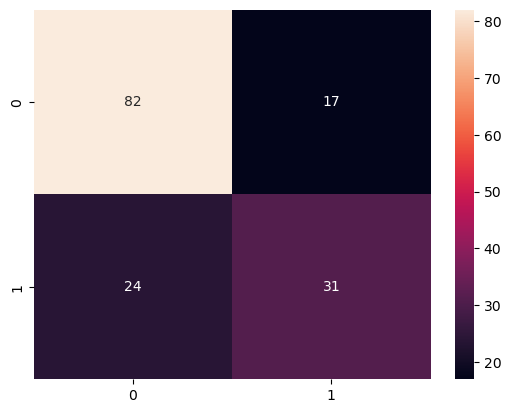

In [35]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm , annot=True)

In [36]:
# from sklearn.metrics import accuracy_score, precision_score
# print(accuracy_score(y_test,svm_y_pred))
# print(precision_score(y_test , svm_y_pred))

In [37]:
svm_acc = accuracy_score(y_test,svm_y_pred)
svm_pre = precision_score(y_test , svm_y_pred)
svm_cm = confusion_matrix(y_test,svm_y_pred)

print(svm_acc)
print(svm_pre)
print(svm_cm)

0.7337662337662337
0.6458333333333334
[[82 17]
 [24 31]]


# 4.Artificial Neural networks(ANN)

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Dropout

In [39]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 400 , activation='relu' , input_dim=8))
classifier.add(Dropout(rate=0.1))
# Adding Second hidden layer
classifier.add(Dense(units = 400 , activation='relu'))
classifier.add(Dropout(rate=0.1))
# Output layer
classifier.add(Dense(units = 1 , activation='sigmoid'))

In [40]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [41]:
classifier.fit(x_train, y_train, batch_size=32 , epochs = 100)

Epoch 1/100
20/20 [==============================] - 3s 11ms/step - loss: 0.5411 - accuracy: 0.7264
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4753 - accuracy: 0.7801
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4349 - accuracy: 0.7883
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4291 - accuracy: 0.7932
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4257 - accuracy: 0.7932
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4175 - accuracy: 0.7997
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4105 - accuracy: 0.8111
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3959 - accuracy: 0.8176
Epoch 9/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4000 - accuracy: 0.8029
Epoch 10/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3945 - accuracy: 0.8143
Epoch 1

20/20 [==============================] - 0s 8ms/step - loss: 0.0981 - accuracy: 0.9739
Epoch 83/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0884 - accuracy: 0.9772
Epoch 84/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0831 - accuracy: 0.9837
Epoch 85/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0854 - accuracy: 0.9739
Epoch 86/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0874 - accuracy: 0.9805
Epoch 87/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0800 - accuracy: 0.9756
Epoch 88/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0928 - accuracy: 0.9756
Epoch 89/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1056 - accuracy: 0.9674
Epoch 90/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0828 - accuracy: 0.9739
Epoch 91/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0734 - accuracy: 0.9821
Epoch 92/10

In [42]:
ann_y_pred = classifier.predict(x_test)

5/5 [==============================] - 0s 5ms/step


In [43]:
ann_y_pred[0]

array([0.00243394], dtype=float32)

In [44]:
ann_y_pred = ann_y_pred >=0.5

<AxesSubplot:>

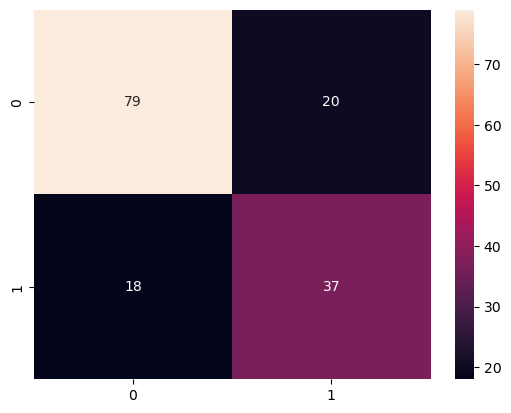

In [45]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_test, ann_y_pred)
sns.heatmap(ann_cm , annot=True)

In [46]:
# from sklearn.metrics import accuracy_score, precision_score
# print(accuracy_score(y_test,ann_y_pred))
# print(precision_score(y_test , ann_y_pred))

In [47]:
ann_acc = accuracy_score(y_test,ann_y_pred)
ann_pre = precision_score(y_test , ann_y_pred)
ann_cm = confusion_matrix(y_test,ann_y_pred)

print(ann_acc)
print(ann_pre)
print(ann_cm)

0.7532467532467533
0.6491228070175439
[[79 20]
 [18 37]]


# 5.Navie bayes classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
nb = GaussianNB()

In [50]:
nb.fit(x_train, y_train)

GaussianNB()

In [51]:
nb_y_pred = nb.predict(x_test)

In [52]:
nb_acc = accuracy_score(y_test,nb_y_pred)
nb_pre = precision_score(y_test , nb_y_pred)
nb_cm = confusion_matrix(y_test,nb_y_pred)

print(nb_acc)
print(nb_pre)
print(nb_cm)

0.7662337662337663
0.6610169491525424
[[79 20]
 [16 39]]


# 6.Decision tree algoritham

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [54]:
dtc = DecisionTreeClassifier()

# Fitting the classifier to the training data
dtc.fit(x_train, y_train)

# Making predictions on the test data
d_y_pred = dtc.predict(x_test)

# # Calculating the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# # Printing the accuracy score
# print('Accuracy:', accuracy)

In [55]:
d_acc = accuracy_score(y_test,d_y_pred)
d_pre = precision_score(y_test , d_y_pred)
d_cm = confusion_matrix(y_test,d_y_pred)

print(d_acc)
print(d_pre)
print(d_cm)

0.7662337662337663
0.6666666666666666
[[80 19]
 [17 38]]


# 7.random forest classifier

In [56]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
r_y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the model
r_acc = accuracy_score(y_test,r_y_pred)
r_pre = precision_score(y_test , r_y_pred)
r_cm = confusion_matrix(y_test,r_y_pred)

print(r_acc)
print(r_pre)
print(r_cm)

0.7207792207792207
0.6071428571428571
[[77 22]
 [21 34]]


In [58]:
#perfoemance of all algorithams
result=pd.DataFrame({
    "algorithams":["logistic regression","knn","svm","ann","naive bayes","decision tree","random forest classifier"],
    "Accuracy":[lg_acc,knn_acc,svm_acc,ann_acc,nb_acc,d_acc,r_acc],
    "precision":[lg_pre,knn_pre,svm_pre,ann_pre,nb_pre,d_pre,r_pre],
    "confusion matrix":[lg_cm,knn_cm,svm_cm,ann_cm,nb_cm,d_cm,r_cm],
})
result.head(7)

,algorithams,Accuracy,precision,confusion matrix
0,logistic regression,0.753247,0.649123,"[[79, 20], [18, 37]]"
1,knn,0.766234,0.743590,"[[89, 10], [26, 29]]"
2,svm,0.733766,0.645833,"[[82, 17], [24, 31]]"
3,ann,0.753247,0.649123,"[[79, 20], [18, 37]]"
4,naive bayes,0.766234,0.661017,"[[79, 20], [16, 39]]"
5,decision tree,0.766234,0.666667,"[[80, 19], [17, 38]]"
6,random forest classifier,0.720779,0.607143,"[[77, 22], [21, 34]]"


# saving the models

In [59]:
#import pickle
#pickle.dump(svm_classifier, open('model.pkl', 'wb'))
#pickle.dump(sc, open('sc.pkl', 'wb'))

In [60]:
import pickle
pickle.dump(knn_classifier, open('model.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))